In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import  SequentialFeatureSelector
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

import json

In [2]:
df = pd.read_csv('Travail_données_AH\opti_df_AH.csv')
df.head()

,condition,Streptococcus_anginosus___ref_mOTU_v2_0004__,Enterobacteriaceae_sp.___ref_mOTU_v2_0036__,Citrobacter_sp.___ref_mOTU_v2_0076__,Klebsiella_michiganensis/oxytoca___ref_mOTU_v2_0079__,Dielma_fastidiosa___ref_mOTU_v2_0138__,Streptococcus_constellatus/intermedius___ref_mOTU_v2_0143__,Streptococcus_sp._HSISM1___ref_mOTU_v2_0145__,Peptostreptococcus_anaerobius___ref_mOTU_v2_0148__,Bifidobacterium_breve___ref_mOTU_v2_0157__,...,unknown_Firmicutes___meta_mOTU_v2_7760__,Clostridium_sp._CAG__138___meta_mOTU_v2_7765__,unknown_Clostridiales___meta_mOTU_v2_7769__,Ruminococcus_sp._CAG__403___meta_mOTU_v2_7774__,unknown_Porphyromonas___meta_mOTU_v2_7777__,unknown_Clostridiales___meta_mOTU_v2_7778__,unknown_Clostridiales___meta_mOTU_v2_7784__,unknown_Erysipelotrichaceae___meta_mOTU_v2_7790__,unknown_Clostridiales___meta_mOTU_v2_7800__,country
0,control,0.000000,0.000000,0.000000,0.000000,0.000083,0.000000,0.000249,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000083,Australia
1,control,0.000591,0.000066,0.000000,0.000000,0.000000,0.000066,0.000197,0.0,0.000000,...,0.0,0.000000,0.000066,0.0,0.0,0.000000,0.0,0.0,0.000000,Australia
2,control,0.000840,0.000065,0.002454,0.000000,0.000000,0.000065,0.002777,0.0,0.000000,...,0.0,0.000065,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,Australia
3,control,0.000000,0.000071,0.000000,0.000000,0.000213,0.000071,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,Australia
4,control,0.000085,0.019236,0.001111,0.000256,0.000000,0.000000,0.000000,0.0,0.000342,...,0.0,0.025648,0.000171,0.0,0.0,0.000171,0.0,0.0,0.000000,Australia


In [3]:
target_name = 'condition'
Y = df.loc[:,target_name]
X = df.drop(target_name, axis = 1)

In [4]:
numeric_features = []
categorical_features = []
for i,t in X.dtypes.items():
    if ('float' in str(t)) or ('int' in str(t)) :
        numeric_features.append(i)
    else :
        categorical_features.append(i)

print('Found numeric features ', numeric_features)
print('Found categorical features ', categorical_features)

Found numeric features  ['Streptococcus_anginosus___ref_mOTU_v2_0004__', 'Enterobacteriaceae_sp.___ref_mOTU_v2_0036__', 'Citrobacter_sp.___ref_mOTU_v2_0076__', 'Klebsiella_michiganensis/oxytoca___ref_mOTU_v2_0079__', 'Dielma_fastidiosa___ref_mOTU_v2_0138__', 'Streptococcus_constellatus/intermedius___ref_mOTU_v2_0143__', 'Streptococcus_sp._HSISM1___ref_mOTU_v2_0145__', 'Peptostreptococcus_anaerobius___ref_mOTU_v2_0148__', 'Bifidobacterium_breve___ref_mOTU_v2_0157__', 'Klebsiella_sp.___ref_mOTU_v2_0160__', 'Streptococcus_vestibularis___ref_mOTU_v2_0198__', 'Megasphaera_elsdenii___ref_mOTU_v2_0252__', 'Streptococcus_sp.___ref_mOTU_v2_0261__', 'Enterobacter_sp.___ref_mOTU_v2_0265__', 'Bacteroides_stercoris___ref_mOTU_v2_0275__', 'Prevotella_nigrescens___ref_mOTU_v2_0276__', 'Ruminococcus_gnavus___ref_mOTU_v2_0280__', 'Bacteroides_fragilis___ref_mOTU_v2_0286__', 'Bacteroides_fragilis___ref_mOTU_v2_0287__', 'Bacteroides_nordii___ref_mOTU_v2_0302__', 'Coprococcus_sp.___ref_mOTU_v2_0303__', 'S

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler = StandardScaler()
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('encoder', OneHotEncoder(drop='first'))])

preprocessor = ColumnTransformer(transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

labelencoder = LabelEncoder()
Y_train = labelencoder.fit_transform(Y_train)
Y_test = labelencoder.transform(Y_test)

In [6]:
regressor = LogisticRegression()

feature_selector = SequentialFeatureSelector(regressor, k_features="best", forward=False, floating=False, verbose=2, n_jobs=-1, scoring='accuracy', cv=5)
features_list= feature_selector.fit(X_train, Y_train)
selected_features = list(features_list.k_feature_idx_)
print("Caractéristiques sélectionnées:", selected_features)

regressor.fit(X_train[:, selected_features], Y_train)
y_pred = regressor.predict(X_test[:, selected_features])
accuracy = accuracy_score(Y_test, y_pred)
print("Précision avec les caractéristiques sélectionnées:", accuracy)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   29.2s
[Parallel(n_jobs=-1)]: Done 443 out of 443 | elapsed:   35.7s finished

[2023-08-30 10:32:17] Features: 442/1 -- score: 0.6432893509262962[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   25.9s
[Parallel(n_jobs=-1)]: Done 442 out of 442 | elapsed:   32.6s finished

[2023-08-30 10:32:50] Features: 441/1 -- score: 0.6514460882313742[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   10.1s


Caractéristiques sélectionnées: [0, 1, 2, 5, 11, 18, 21, 26, 28, 33, 34, 40, 42, 43, 44, 47, 49, 52, 53, 55, 56, 58, 59, 67, 73, 74, 76, 77, 78, 79, 81, 83, 85, 86, 92, 108, 109, 110, 119, 122, 130, 131, 136, 139, 141, 144, 145, 149, 152, 156, 158, 165, 168, 175, 176, 178, 179, 181, 184, 190, 192, 196, 197, 208, 210, 211, 223, 229, 231, 235, 243, 248, 249, 256, 259, 261, 265, 266, 267, 268, 269, 271, 272, 278, 281, 283, 284, 285, 287, 290, 300, 302, 304, 310, 311, 320, 321, 323, 325, 333, 335, 337, 345, 362, 365, 369, 373, 375, 376, 386, 389, 402, 403, 404, 409, 414, 415, 416, 420, 422, 423, 429, 433, 437, 440]
Précision avec les caractéristiques sélectionnées: 0.6168831168831169


In [24]:
json_object = json.dumps(selected_features)
with open("sample_B.json", "w") as outfile:
    outfile.write(json_object)

In [8]:
sfs= pd.DataFrame.from_dict(feature_selector.get_metric_dict()).T
sfs.head()

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
443,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.5853658536585366, 0.6666666666666666, 0.634...",0.631867,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.045783,0.035621,0.01781
442,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.6178861788617886, 0.6747967479674797, 0.626...",0.643289,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.033233,0.025856,0.012928
441,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.6178861788617886, 0.6747967479674797, 0.650...",0.651446,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.027949,0.021745,0.010873
440,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.6341463414634146, 0.6747967479674797, 0.658...",0.657963,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.020265,0.015767,0.007883
439,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.6422764227642277, 0.6747967479674797, 0.666...",0.661216,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.017663,0.013743,0.006871


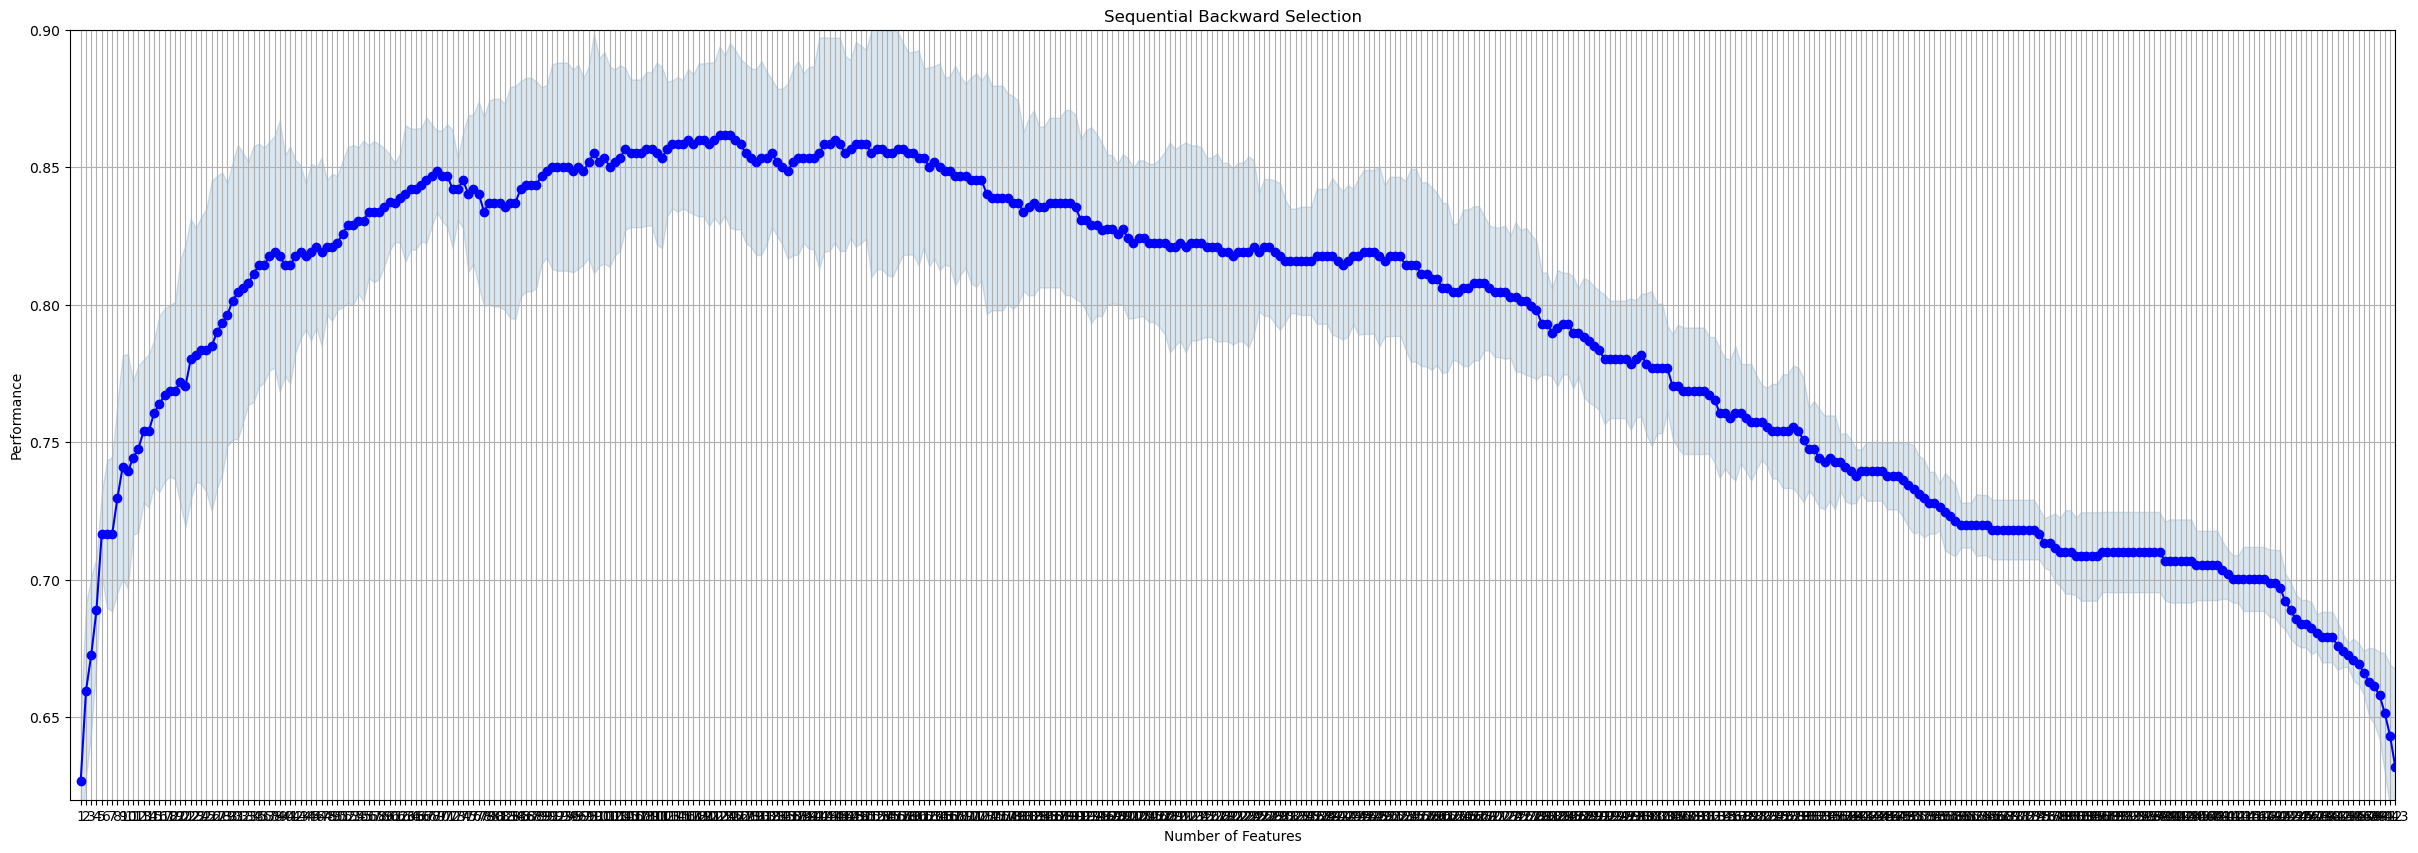

In [12]:
fig = plot_sfs(feature_selector.get_metric_dict(), figsize= (30, 10))

plt.ylim([0.62, 0.9])
plt.xlim([-1, len(feature_selector.get_metric_dict())])
plt.title('Sequential Backward Selection')
plt.grid()
plt.show()

In [14]:
sfs_max= sfs.query('avg_score == avg_score.max()')
sfs_max.head()

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
125,"(0, 1, 2, 5, 11, 18, 21, 26, 28, 33, 34, 40, 4...","[0.8211382113821138, 0.8211382113821138, 0.894...",0.861589,"(0, 1, 2, 5, 11, 18, 21, 26, 28, 33, 34, 40, 4...",0.043216,0.033624,0.016812


La sélection de feature ne sera pas conserver, car jugée non satisfaisante.